In [252]:
import pandas as pd
import numpy as np
import ast

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
os.path.join('data')

'data'

In [253]:
df_RAW_recipes = pd.read_csv(
    'C:\\Users\\Utilisateur\\Desktop\\Code\\Projects\\tp_bgdia700\\data\\dataset\\RAW_recipes.csv')
df_RAW_interactions = pd.read_csv(
    'C:\\Users\\Utilisateur\\Desktop\\Code\\Projects\\tp_bgdia700\\data\\dataset\\RAW_interactions.csv')

Information de nutrition : calories (#), total fat (PDV), sugar (PDV) , sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV)

Récapitulatif des Relations :

    Les calories sont la somme des calories fournies par les graisses, les glucides et les protéines.
    Les graisses totales incluent les graisses saturées, mais aussi les graisses insaturées et trans.
    Le sucre est un type de glucide, mais n'est pas une graisse ni une protéine.
    Le sodium est un minéral indépendant, n'appartenant à aucune des autres catégories.
    Les protéines sont une catégorie distincte des graisses et des glucides.
    Les glucides incluent le sucre et d'autres types de glucides complexes (comme l'amidon et les fibres).

En résumé :

    Les graisses saturées font partie des graisses totales.
    Les sucres sont une forme de glucides.
    Les calories proviennent de graisses, glucides et protéines.
    Le sodium, les protéines, et les glucides (hors sucres) sont des catégories distinctes.

Que signifie le PDV ?

Le %PDV indique quel pourcentage de la valeur quotidienne recommandée d'un nutriment est fourni par une portion d'un aliment spécifique. Par exemple, si un aliment contient 15% du PDV pour le total fat (graisses totales), cela signifie qu'une portion de cet aliment fournit 15% de la quantité de graisses recommandée pour une alimentation de 2000 calories.
Comment se calcule le PDV ?

Le calcul du %PDV pour un nutriment est le suivant :

PDV=(Quantité du nutriment dans la portion/Quantité recommandée quotidienne pour ce nutriment)×100

# 1. Création du Dataframe

In [254]:
# On ne garde que la moyenne des notes de la recette
df_mean_rating = df_RAW_interactions[[
    'recipe_id', 'rating']].groupby(['recipe_id']).mean()
# On ne garde que le nombre de notes de la recette
df_count_rating = df_RAW_interactions[[
    'recipe_id', 'rating']].groupby(['recipe_id']).count()

In [255]:
df_nutrition = df_RAW_recipes[[
    'id', 'nutrition']]

merged_df = df_nutrition.merge(df_mean_rating, left_on='id', right_on='recipe_id').merge(
    df_count_rating, left_on='id', right_on='recipe_id')

merged_df.rename(columns={'rating_x': 'Moyenne des notes',
                          'rating_y': 'Nombre de notes'}, inplace=True)

# Convertir les chaînes de caractères en listes
merged_df['nutrition'] = merged_df['nutrition'].apply(ast.literal_eval)

# Convertir la colonne de listes en plusieurs colonnes
valeurs_df = pd.DataFrame(
    merged_df['nutrition'].tolist(), index=merged_df.index)

# Renommer les colonnes si nécessaire
valeurs_df.columns = ['calories', 'total_fat', 'sugar', 'sodium',
                      'protein', 'saturated_fat', 'carbohydrates']


# Joindre le DataFrame original avec le nouveau DataFrame
final_df = merged_df.drop(columns=['nutrition', 'id']).join(valeurs_df)

final_df.apply(pd.to_numeric)

,Moyenne des notes,Nombre de notes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
0,5.0,3,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,3.5,4,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,4.0,1,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,4.5,2,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,5.0,1,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...
231632,5.0,6,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,5.0,1,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,5.0,5,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,1.0,1,188.0,11.0,57.0,11.0,7.0,21.0,9.0


# 2. Analyse des données

<Axes: >

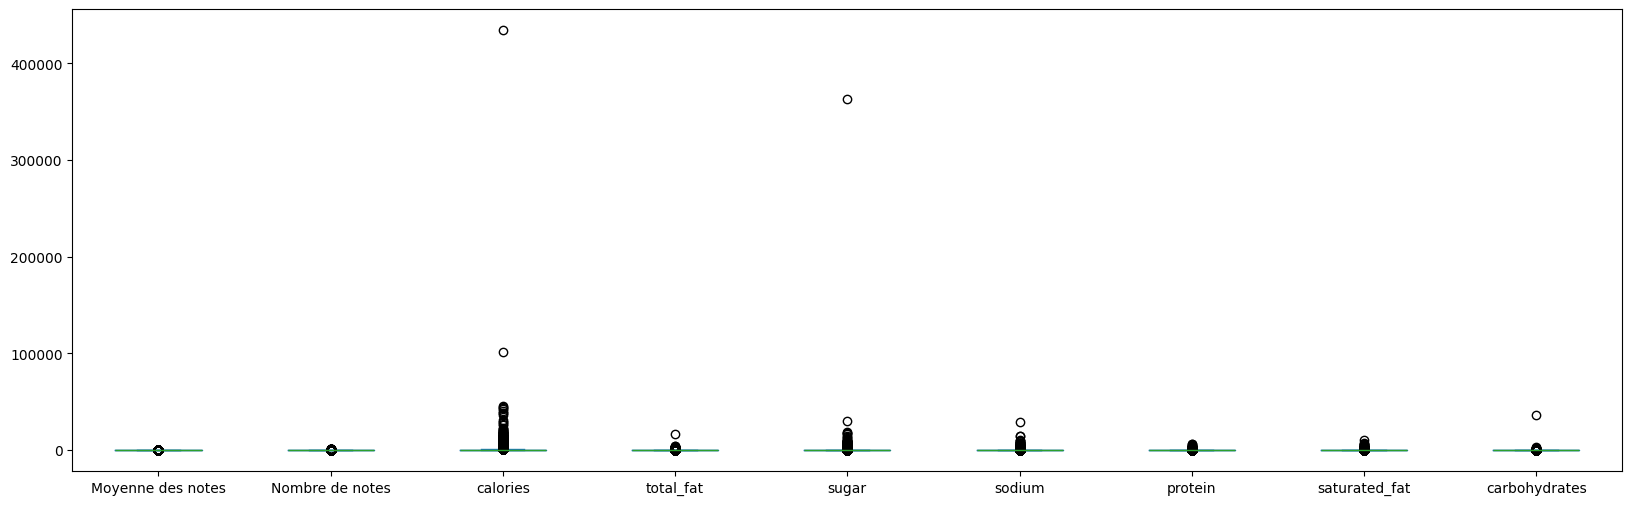

In [256]:
final_df.plot(kind='box', figsize=(20, 6))

In [257]:
# Valeurs extrêmes :
display(final_df[final_df.calories > 100000])
display(final_df[final_df.sugar > 100000])
display(final_df[final_df.carbohydrates > 30000])

# Valeurs négatives ?
print((final_df < 0).any().any())

# Valeurs nulles ?
print((final_df == 0).any())


print(final_df[final_df.calories < 100].shape[0])
print(final_df[final_df.total_fat == 0].shape[0])
print(final_df[final_df.sugar == 0].shape[0])
print(final_df[final_df.sodium == 0].shape[0])
print(final_df[final_df.protein == 0].shape[0])
print(final_df[final_df.saturated_fat == 0].shape[0])
print(final_df[final_df.carbohydrates == 0].shape[0])

,Moyenne des notes,Nombre de notes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
70467,4.0,1,101614.7,17183.0,0.0,230.0,1271.0,10395.0,1.0
209453,0.0,3,434360.2,1293.0,362729.0,1324.0,3961.0,590.0,36098.0


,Moyenne des notes,Nombre de notes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
209453,0.0,3,434360.2,1293.0,362729.0,1324.0,3961.0,590.0,36098.0


,Moyenne des notes,Nombre de notes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
209453,0.0,3,434360.2,1293.0,362729.0,1324.0,3961.0,590.0,36098.0


False
Moyenne des notes     True
Nombre de notes      False
calories              True
total_fat             True
sugar                 True
sodium                True
protein               True
saturated_fat         True
carbohydrates         True
dtype: bool
25857
16770
10322
19841
9837
19732
13068


,Moyenne des notes,Nombre de notes,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates
count,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00,231637.00
mean,4.35,4.89,473.94,36.08,84.30,30.15,34.68,45.59,15.56
std,0.99,17.53,1189.71,77.80,800.08,131.96,58.47,98.24,81.82
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4.00,1.00,174.40,8.00,9.00,5.00,7.00,7.00,4.00
50%,4.71,2.00,313.40,20.00,25.00,14.00,18.00,23.00,9.00
75%,5.00,4.00,519.70,41.00,68.00,33.00,51.00,52.00,16.00
max,5.00,1613.00,434360.20,17183.00,362729.00,29338.00,6552.00,10395.00,36098.00


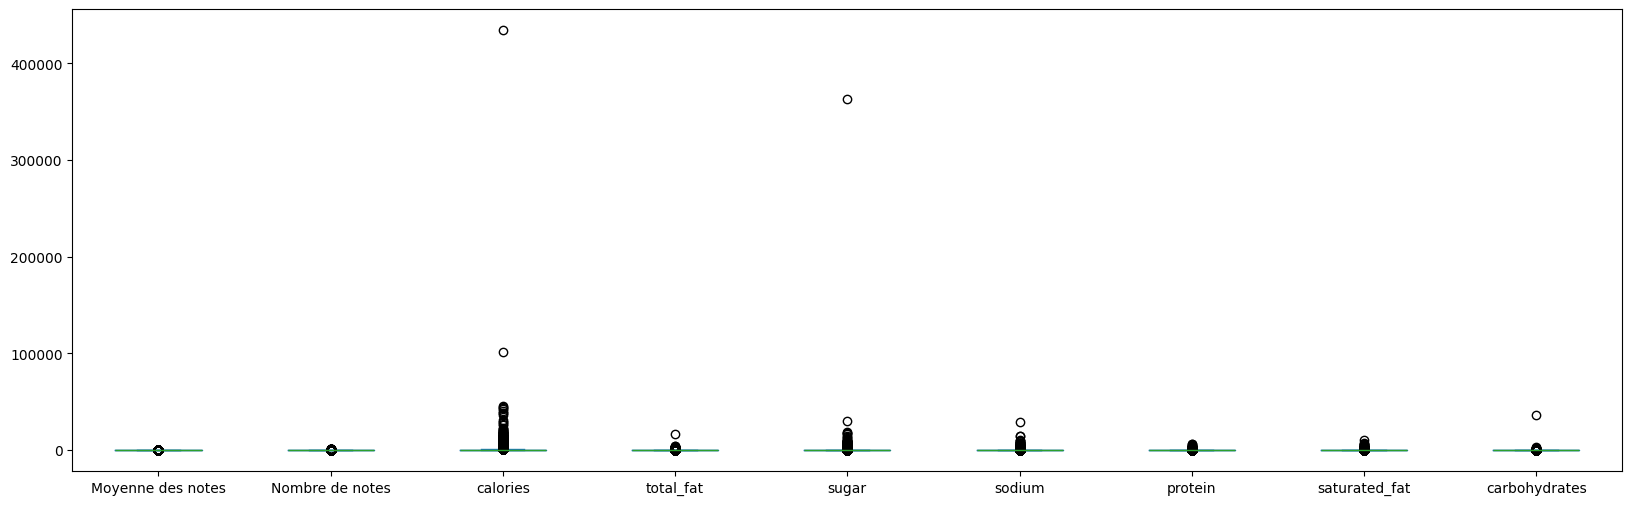

In [258]:
final_df.plot(kind='box', figsize=(20, 6))
final_df.describe().round(2)

# 3. Preprocessing

In [259]:
print(final_df.shape)
final_df = final_df[(final_df['Nombre de notes'] >= 1)]
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.calories > 3000].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.total_fat > 100].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.saturated_fat > 100].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.sugar > 100].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.sodium > 100].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.protein > 100].index)
print(final_df.shape)
final_df = final_df.drop(final_df[final_df.carbohydrates > 100].index)
print(final_df.shape)

(231637, 9)
(231637, 9)
(228486, 9)
(217783, 9)
(207068, 9)
(176515, 9)
(173412, 9)
(168335, 9)
(168294, 9)


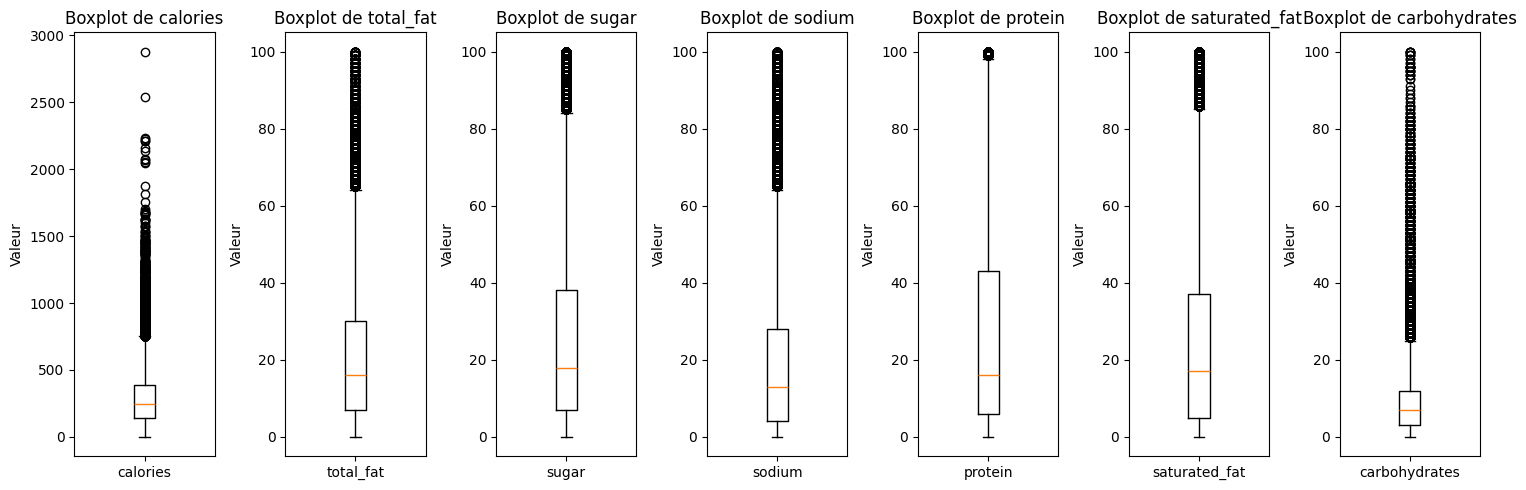

In [260]:
final_df_nutrition = final_df[['calories', 'total_fat', 'sugar', 'sodium',
                              'protein', 'saturated_fat', 'carbohydrates']]

# Création d'une figure avec des sous-graphiques
fig, axes = plt.subplots(1, len(final_df_nutrition.columns), figsize=(15, 5))

# Tracer un boxplot pour chaque colonne
for i, col in enumerate(final_df_nutrition.columns):
    # Tracer le boxplot pour chaque colonne
    axes[i].boxplot(final_df_nutrition[col])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_xticklabels([col])  # Nommer l'axe X (nom de la colonne)
    axes[i].set_ylabel('Valeur')  # Optionnel: étiquette pour l'axe Y

# Ajuster l'espacement pour que les graphes ne se chevauchent pas
plt.tight_layout()
plt.show()

total_fat        0.0
protein          2.0
carbohydrates    4.0
Name: 0, dtype: float64


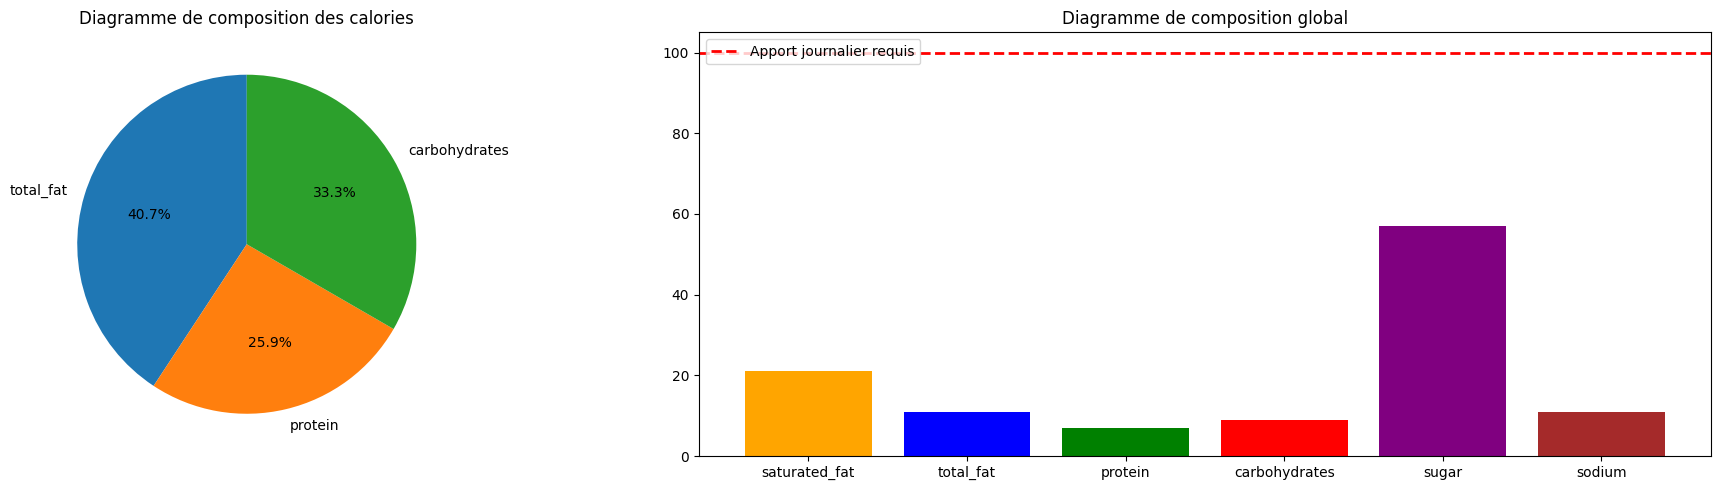

total_fat        0.0
protein          2.0
carbohydrates    4.0
Name: 0, dtype: float64


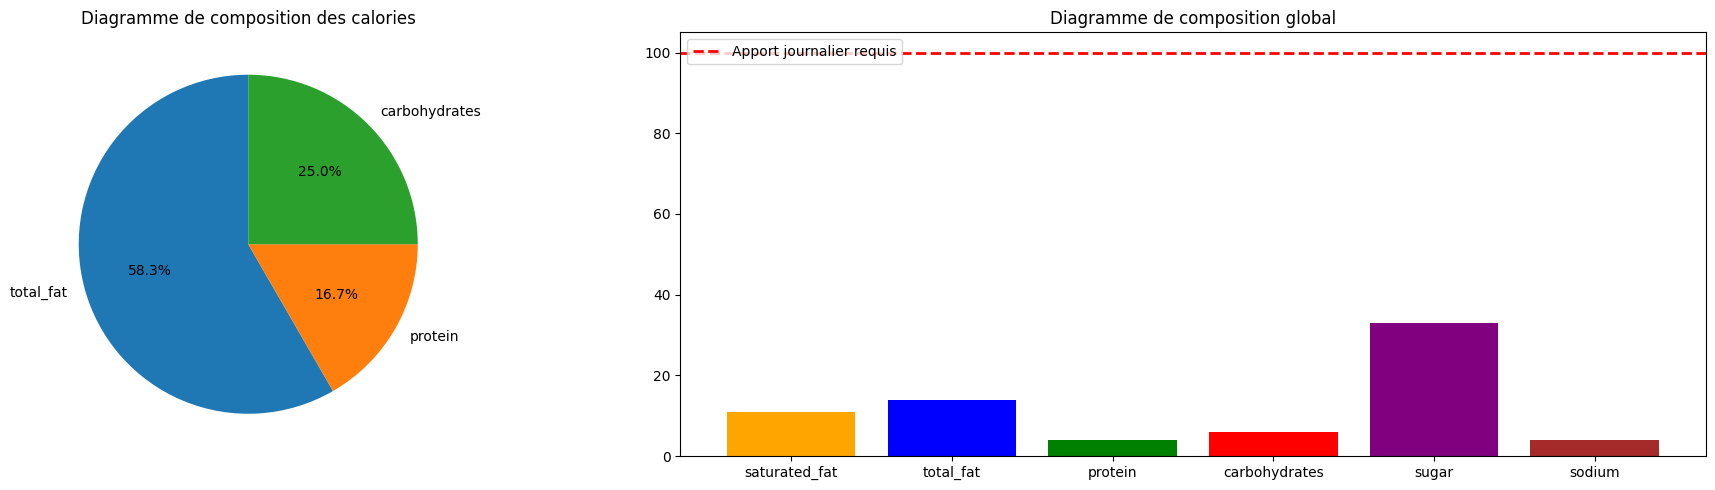

In [269]:
for i in range(len(final_df.index)-2, len(final_df.index)):

    fig, axs = plt.subplots(1, 2, figsize=(20, 5))

    calories_line = final_df[['total_fat', 'protein',
                              'carbohydrates']].loc[final_df.index[i]]
    print(final_df[['total_fat', 'protein',
                          'carbohydrates']].loc[final_df["calories"] == final_df['calories'][0]].loc[0])
    # Tracer le premier diagramme circulaire
    axs[0].pie(calories_line, labels=calories_line.index,
               autopct='%1.1f%%', startangle=90)
    axs[0].set_title("Diagramme de composition des calories")

    full_line = final_df[['saturated_fat', 'total_fat',
                          'protein', 'carbohydrates', 'sugar', 'sodium',]].loc[final_df.index[i]]

    # Tracer le troisième diagramme circulaire
    axs[1].bar(full_line.index, full_line, color=[
               'orange', 'blue', 'green', 'red', 'purple', 'brown', 'cyan'])
    axs[1].axhline(100, color='red', linestyle='dashed',
                   linewidth=2, label='Apport journalier requis')
    axs[1].legend(loc='upper left')
    axs[1].set_title("Diagramme de composition global")

    plt.tight_layout()
    plt.show()

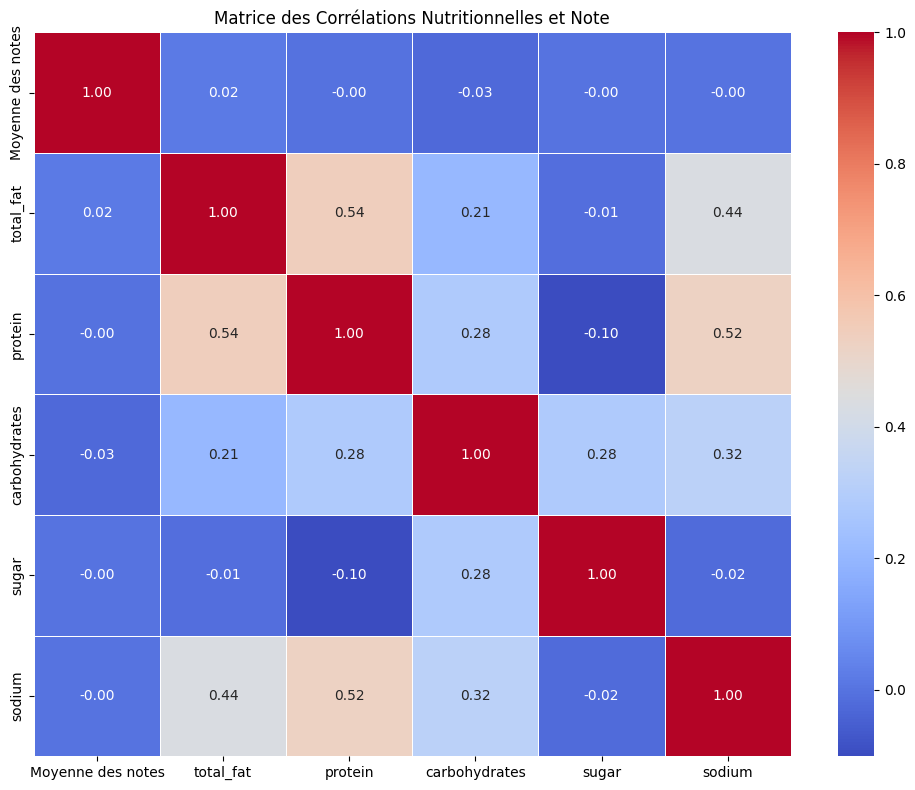

In [262]:
correlation_matrix = final_df[['Moyenne des notes', 'total_fat',
                               'protein', 'carbohydrates', 'sugar', 'sodium']].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True,
            cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Ajouter un titre
plt.title("Matrice des Corrélations Nutritionnelles et Note")

# Afficher le graphique
plt.tight_layout()
plt.show()